In [3]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('boston.csv')

In [4]:
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [7]:
# housing_df=housing_df.drop("Id",axis=1)


In [9]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['MEDV'], axis=1),
    housing_df['MEDV'],
    test_size=0.3,
    random_state=0)

In [10]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.30915737, 0.17597357, 0.49184296, 0.0277529 , 0.43582916,
       0.59118674, 0.30987139, 0.31220824, 0.19551958, 0.36277404,
       0.49984377, 0.16966839, 0.63432212])

In [11]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LSTAT      0.634322
RM         0.591187
PTRATIO    0.499844
INDUS      0.491843
NOX        0.435829
TAX        0.362774
DIS        0.312208
AGE        0.309871
CRIM       0.309157
RAD        0.195520
ZN         0.175974
B          0.169668
CHAS       0.027753
dtype: float64

<Axes: >

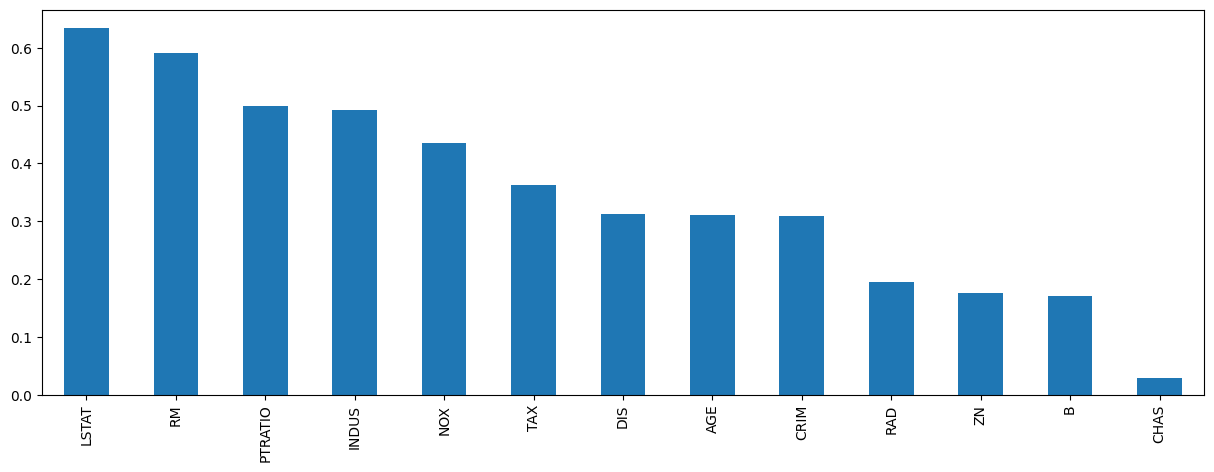

In [12]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [13]:
from sklearn.feature_selection import SelectPercentile


In [14]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002295BC97C10>)

In [15]:
selected_top_columns.get_support()


array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True])

In [16]:
X_train.columns[selected_top_columns.get_support()]


Index(['INDUS', 'RM', 'LSTAT'], dtype='object')